# EXAMEN CURSO ANALISIS DE DATOS - PUC EEIGM October 2024 (20min)
Test 1 |
**Raúl Benítez**

1. Use the function load_dataset from the seaborn libarry to load the dataset 'diamonds'

https://seaborn.pydata.org/generated/seaborn.load_dataset.html

In [2]:
import pandas as pd
import seaborn as sns
d = sns.load_dataset("diamonds")
d.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


2. Eliminad las variables 'carat', 'color', 'clarity'. Utilizaremos 'table', 'price', 'x', 'y' y 'z' como features y la variable 'cut' como etiqueta de clase.


In [3]:
d = d.drop(['carat', 'color', 'clarity'], axis=1)
y = d['cut']
d.head()

,cut,depth,table,price,x,y,z
0,Ideal,61.5,55.0,326,3.95,3.98,2.43
1,Premium,59.8,61.0,326,3.89,3.84,2.31
2,Good,56.9,65.0,327,4.05,4.07,2.31
3,Premium,62.4,58.0,334,4.20,4.23,2.63
4,Good,63.3,58.0,335,4.34,4.35,2.75


3. Representad los datos mediante un scatter plot matrix utilizando colores diferentes para cada clase

KeyboardInterrupt: 

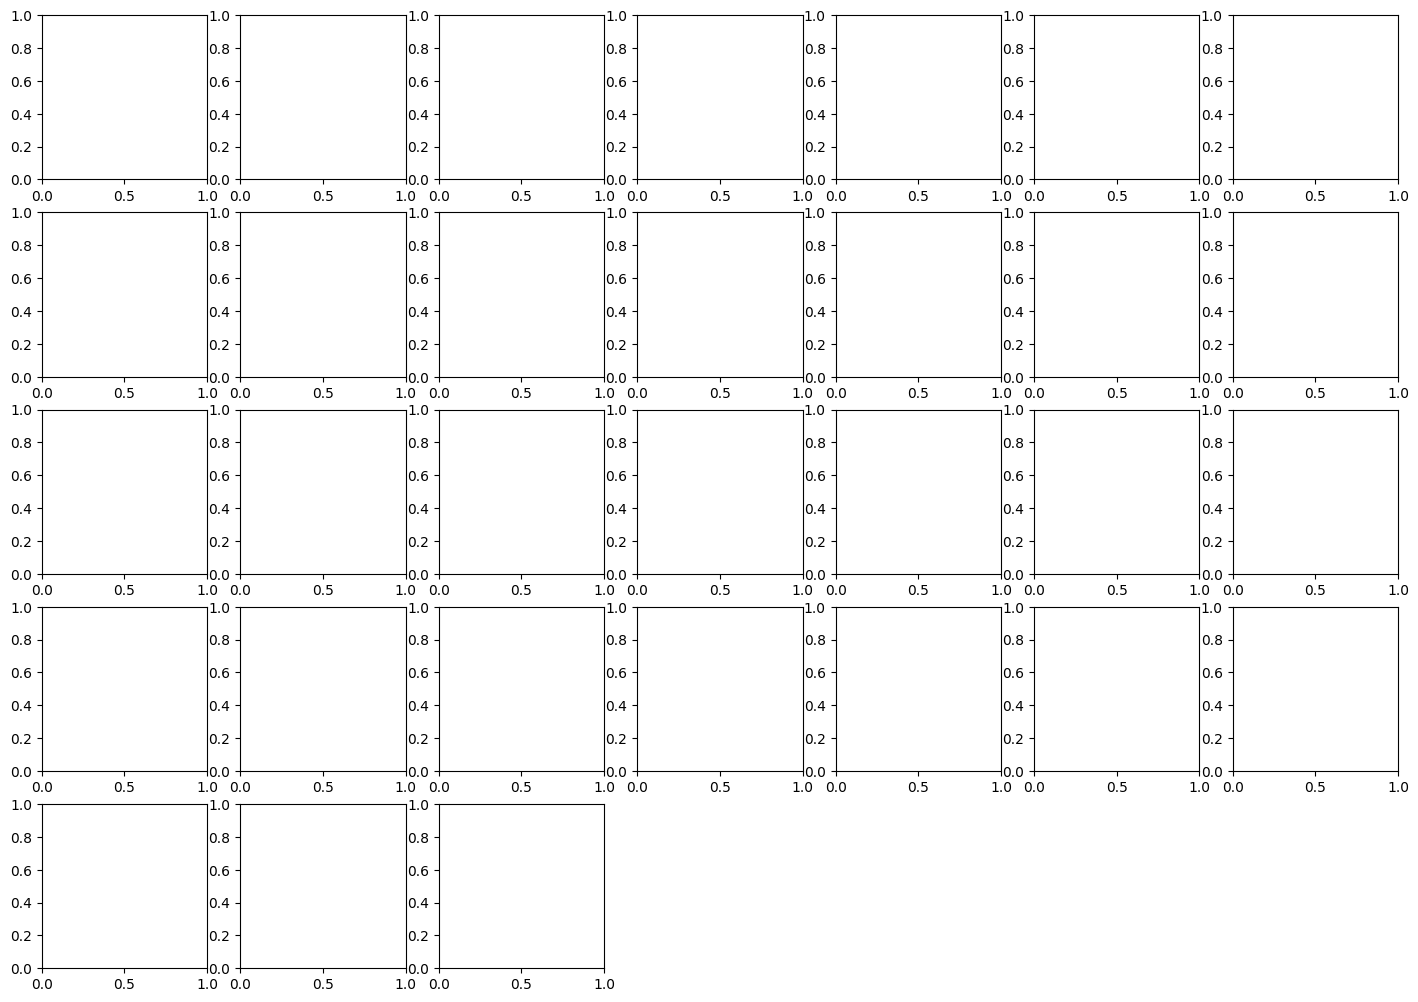

In [5]:
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt
g = sns.pairplot(d, hue="cut")


4. Dividid los datos en los subconjuntos de entrenamiento (70%) y test (30%)

In [ ]:
from sklearn.model_selection import train_test_split
d_numeric = d.select_dtypes(include=np.number)
y = d['cut']
X = d_numeric



# Now X and y should have the same number of samples
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

5. Ajustad 5 modelos de clasificación: KNN, Gaussian Naive Bayes, Decision Trees, Quadratic Discriminant Analysis (QDA). Reportar las matrices de confusion y el classification report.

https://scikit-learn.org/1.5/modules/generated/sklearn.metrics.classification_report.html

¿Qué modelo de clasificación presenta un mayor promeio del F1-score?


In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)    #on sélectionne le nb de voisins
y_knn_pred = knn.fit(X_train, y_train).predict(X_test) #on fait la prédiction
CM_KNN = confusion_matrix(y_test, y_knn_pred)
print('CONFUSION MATRIX KNN: \n {} '.format(CM_KNN))

from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
y_NB_pred = gnb.fit(X_train, y_train).predict(X_test)
CM_NB = confusion_matrix(y_test, y_NB_pred)
print('CONFUSION MATRIX NB: \n {}'.format(CM_NB))

from sklearn.tree import DecisionTreeClassifier  # Import the DecisionTreeClassifier
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
dt = DecisionTreeClassifier()  # Use DecisionTreeClassifier directly
y_DT_pred = dt.fit(X_train, y_train).predict(X_test)
CM_DT = confusion_matrix(y_test, y_DT_pred)
print('CONFUSION MATRIX DT: \n {}'.format(CM_DT))
plt.figure(figsize=(10,10))
ax = plot_tree(dt)
plt.show()